*Exploring data from Pedro*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'ExportCypherviaAPOC29Aug.xlsx'
data = pd.read_excel(filename,sheetname=None)
pd.set_option('max_rows', 5)

In [3]:
data[u'Number Pairs per Year']

,YEAR,Count Rels
0,1965,6
1,1975,2
...,...,...
40,2017,230820
41,2018,145816


In [19]:
ppy = data['Pairs per year']
ndocs = data['Number Docs per Year']
TPVal = ppy['Term Pair'].values
nel = len(ppy['Year'])
print 'Number of entries: %d'%nel
def get_pair_evol(t3,t3_inv):
    # Gets the normalised number of pairs for all years
    idp1 = np.where((TPVal == t3) | (TPVal == t3_inv))[0] #get all pairs
    years = np.sort(np.unique(ppy['Year'][idp1])) # all relevant years for the pair
    nyears = len(years) 
    sum_pairs = ppy.iloc[idp1].groupby('Year') # Grouping by year
    sum_alldocs = sum_pairs.sum()
    ids = [np.where(ndocs['YEAR'].values == x)[0] for x in years] 
    ids_list = [x[0] for x in ids]
    cc = ndocs['Count docs'].values[ids_list]
    norm_pairs = [sum_alldocs.values[x]/(0.0 + cc[x]) for x in range(nyears)]
    np_list = [x[0] for x in norm_pairs]
    
    return years, np_list,t3 #returns the years and list of normalised pairs


Number of entries: 139540


In [ ]:
print ppy.keys()

398


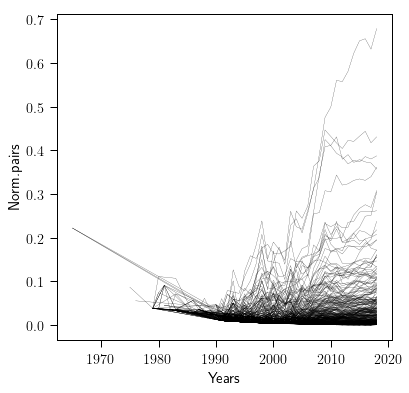

In [21]:
all_pairs = [] #list will contain all pairs with no repetition
plt.figure(1,figsize=(6,6))

for x in range(1000):
    t1 = ppy['t1.Term'][x]
    t2 = ppy['t2.Term'][x]
    t3 = '%s - %s'%(t1,t2)
    t3_inv = '%s - %s'%(t2,t1) # string with the name of the pair in reverse order 
    if t3 in all_pairs or t3_inv in all_pairs:
        continue
    else:
        all_pairs.append(t3)
        year, nplist,pname = get_pair_evol(t3,t3_inv)
        plt.plot(np.array(year),np.array(nplist),'k-',linewidth=0.2)
    
plt.xlabel('Years',fontsize=15)
plt.ylabel('Norm.pairs',fontsize=15)
print len(all_pairs)